In [1]:
# ================================
# Step 1: Load and Clean Data
# ================================


import pandas as pd

df = pd.read_csv(r"F:/GUVI/guvi_3project/Employee-Attrition - Employee-Attrition (1).csv")


print("🔹 First 5 rows of the dataset:")
print(df.head())


print("\n🔹 Dataset shape:", df.shape)


print("\n🔹 Dataset Info:")
print(df.info())


print("\n🔹 Missing values per column:")
print(df.isnull().sum())


useless_cols = [col for col in df.columns if df[col].nunique() == 1]
print("\n🔹 Useless columns detected:", useless_cols)


df.drop(columns=useless_cols, inplace=True, errors='ignore')
print("\n🔹 Columns after dropping useless ones:")
print(df.columns)


if df['Attrition'].dtype == 'object':
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

print("\n🔹 Attrition value counts:")
print(df['Attrition'].value_counts())


df.to_csv(r"F:/GUVI/guvi_3project/employee_attrition_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as 'employee_attrition_cleaned.csv'")



🔹 First 5 rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHo

🔹 Summary statistics:
                Age    Attrition BusinessTravel    DailyRate  \
count   1470.000000  1470.000000           1470  1470.000000   
unique          NaN          NaN              3          NaN   
top             NaN          NaN  Travel_Rarely          NaN   
freq            NaN          NaN           1043          NaN   
mean      36.923810     0.161224            NaN   802.485714   
std        9.135373     0.367863            NaN   403.509100   
min       18.000000     0.000000            NaN   102.000000   
25%       30.000000     0.000000            NaN   465.000000   
50%       36.000000     0.000000            NaN   802.000000   
75%       43.000000     0.000000            NaN  1157.000000   
max       60.000000     1.000000            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN 

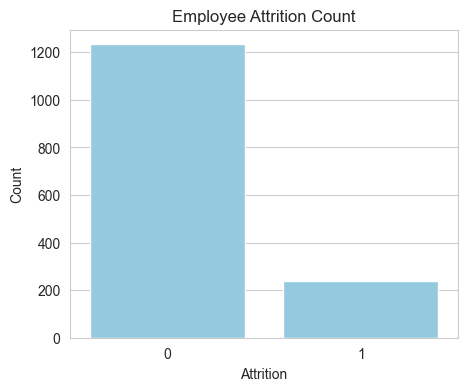


🔹 Attrition Rate: 16.12%


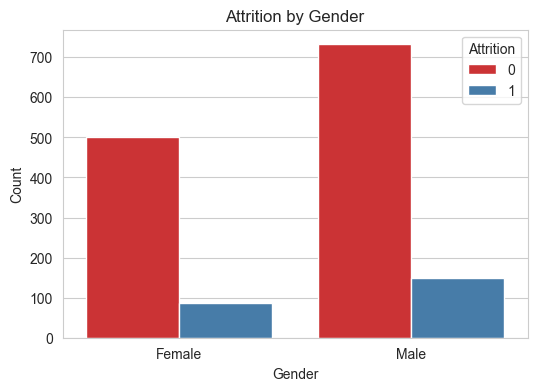

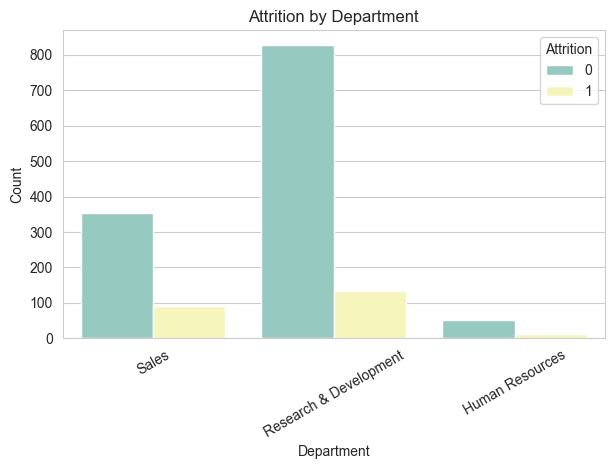

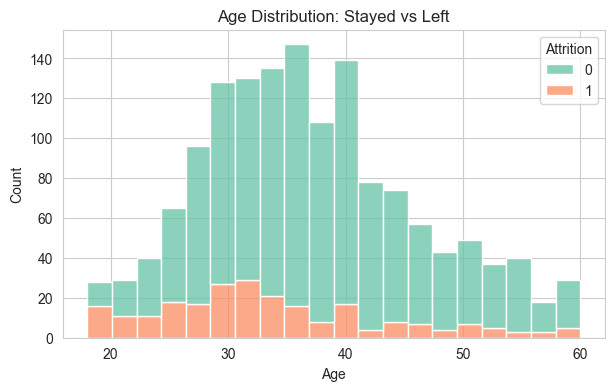

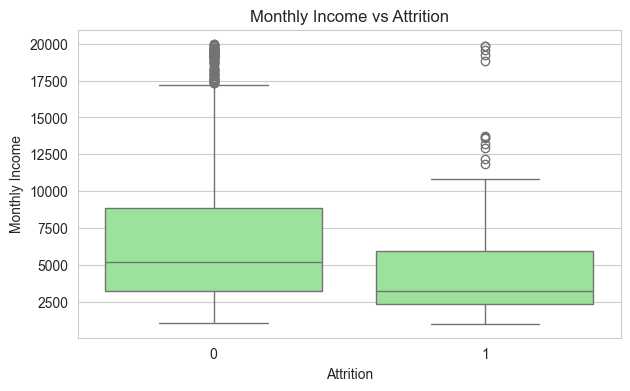

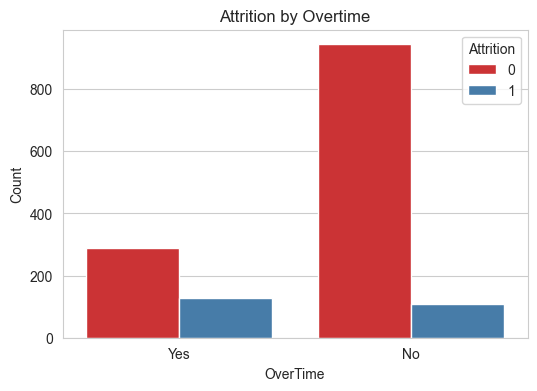

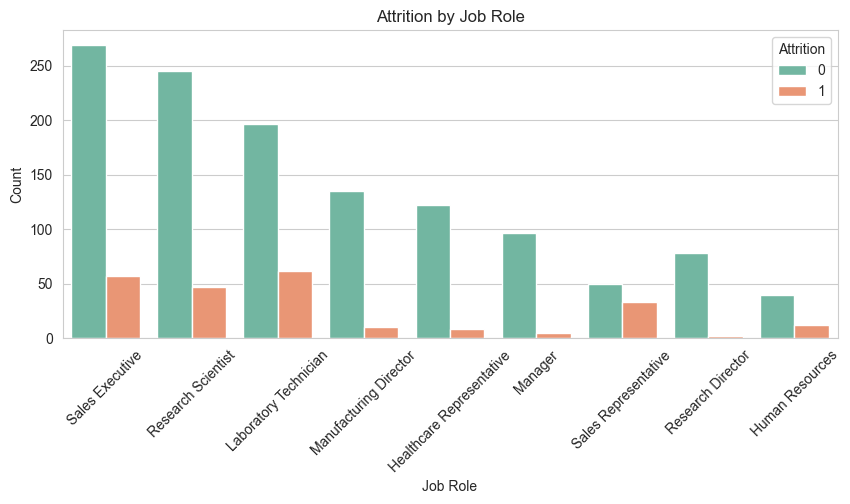

In [2]:
# ================================
# Step 2: Exploratory Data Analysis (EDA)
# ================================

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Summary statistics
print("🔹 Summary statistics:")
print(df.describe(include='all'))

# Attrition distribution
attrition_counts = df['Attrition'].value_counts()
print("\n🔹 Attrition Distribution (0 = Stayed, 1 = Left):")
print(attrition_counts)

plt.figure(figsize=(5,4))
sns.countplot(x='Attrition', data=df, color='skyblue')
plt.title("Employee Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

# Attrition rate
attrition_rate = (df['Attrition'].sum() / len(df)) * 100
print(f"\n🔹 Attrition Rate: {attrition_rate:.2f}%")

# Attrition by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='Set1')
plt.title("Attrition by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Attrition by Department
plt.figure(figsize=(7,4))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set3')
plt.title("Attrition by Department")
plt.xticks(rotation=30)
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

# Age distribution vs Attrition
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', palette='Set2', bins=20)
plt.title("Age Distribution: Stayed vs Left")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Monthly Income vs Attrition
plt.figure(figsize=(7,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, color='lightgreen')
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()

# Overtime vs Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='Set1')
plt.title("Attrition by Overtime")
plt.xlabel("OverTime")
plt.ylabel("Count")
plt.show()

# Optional: Attrition by Job Role
plt.figure(figsize=(10,4))
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='Set2')
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.show()


In [3]:
# =============================
# Step 3: Feature Engineering & Preprocessing
# =============================

from sklearn.preprocessing import LabelEncoder, StandardScaler


categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🔹 Categorical Columns:", categorical_cols)
print("🔹 Numerical Columns:", numerical_cols)


df_encoded = df.copy()


label_enc = LabelEncoder()
for col in categorical_cols:
    if df_encoded[col].nunique() == 2:  
        df_encoded[col] = label_enc.fit_transform(df_encoded[col])
    else:  
        df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True)


df_encoded['Attrition'] = df_encoded['Attrition'].astype(int)


num_features = [col for col in numerical_cols if col != 'Attrition']
scaler = StandardScaler()
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

print("\n✅ Categorical variables encoded and numerical features scaled successfully")
print("Unique values in Attrition:", df_encoded['Attrition'].unique())


# =============================
# Step 4: Save Preprocessed Data for Modeling
# =============================

# Save feature names separately for Streamlit
feature_names = df_encoded.drop('Attrition', axis=1).columns
pd.DataFrame(feature_names, columns=['Feature']).to_csv(
    r"F:/GUVI/guvi_3project/feature_names.csv", index=False
)

# Save preprocessed dataset for model training
df_encoded.to_csv(r"F:/GUVI/guvi_3project/employee_attrition_preprocessed.csv", index=False)

print("\n✅ Preprocessed dataset saved as 'employee_attrition_preprocessed.csv'")
print("✅ Feature names saved as 'feature_names.csv'")



🔹 Categorical Columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
🔹 Numerical Columns: ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

✅ Categorical variables encoded and numerical features scaled successfully
Unique values in Attrition: [1 0]

✅ Preprocessed dataset saved as 'employee_attrition_preprocessed.csv'
✅ Feature names saved as 'feature_names.csv'


In [4]:
# =============================
# Step 5: Model Building & Training
# =============================

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

# Features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Train/Test split done")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


log_model = LogisticRegression(max_iter=1000, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
print("✅ Models trained successfully")


with open(r"F:/GUVI/guvi_3project/log_model.pkl", "wb") as f:
    pickle.dump(log_model, f)
with open(r"F:/GUVI/guvi_3project/tree_model.pkl", "wb") as f:
    pickle.dump(tree_model, f)
with open(r"F:/GUVI/guvi_3project/rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)
print("✅ Trained models saved as .pkl files")


✅ Train/Test split done
X_train shape: (1176, 45)
y_train shape: (1176,)
✅ Models trained successfully
✅ Trained models saved as .pkl files



🔹 Model Performance Comparison with Risk Scores:

Logistic Regression:
   Accuracy: 0.8639
   Precision: 0.6400
   Recall: 0.3404
   F1-score: 0.4444
   AUC: 0.8095
   🔹 Example Risk Scores (first 5 rows): [0.09875998 0.00295453 0.18181306 0.00462857 0.28987762]

Decision Tree:
   Accuracy: 0.7653
   Precision: 0.3103
   Recall: 0.3830
   F1-score: 0.3429
   AUC: 0.6105
   🔹 Example Risk Scores (first 5 rows): [1. 0. 0. 0. 1.]

Random Forest:
   Accuracy: 0.8333
   Precision: 0.4000
   Recall: 0.0851
   F1-score: 0.1404
   AUC: 0.7611
   🔹 Example Risk Scores (first 5 rows): [0.55 0.06 0.2  0.01 0.26]


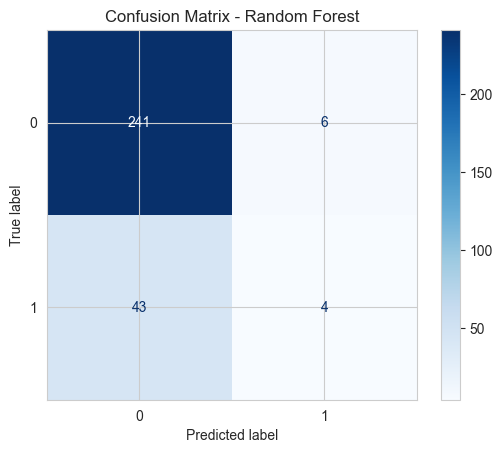

In [5]:
# =============================
# Step 6: Model Evaluation (Updated)
# =============================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] 
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-score": f1_score(y_test, y_pred, zero_division=0),
        "AUC": roc_auc_score(y_test, y_proba)
    }
    return metrics, y_proba


models = {
    "Logistic Regression": log_model,
    "Decision Tree": tree_model,
    "Random Forest": rf_model
}

results = {}
print("\n🔹 Model Performance Comparison with Risk Scores:")
for name, model in models.items():
    metrics, risk_scores = evaluate_model(model, X_test, y_test)
    results[name] = metrics
    print(f"\n{name}:")
    for metric, score in metrics.items():
        print(f"   {metric}: {score:.4f}")
   
    print(f"   🔹 Example Risk Scores (first 5 rows): {risk_scores[:5]}")


best_model = rf_model
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [6]:
# =============================
# Step 7: Save Model & Processed Data
# =============================

import joblib
import pandas as pd


best_model = rf_model


joblib.dump(best_model, r"F:/GUVI/guvi_3project/best_attrition_model.pkl")


joblib.dump(scaler, r"F:/GUVI/guvi_3project/scaler.pkl")


categorical_features = categorical_cols  # from Step 3
joblib.dump(categorical_features, r"F:/GUVI/guvi_3project/categorical_features.pkl")


X.to_csv(r"F:/GUVI/guvi_3project/processed_features.csv", index=False)
y.to_csv(r"F:/GUVI/guvi_3project/target_attrition.csv", index=False)


pd.DataFrame(X.columns, columns=['Feature']).to_csv(r"F:/GUVI/guvi_3project/feature_names.csv", index=False)

print("✅ Best model, scaler, categorical features, and processed data saved successfully")


✅ Best model, scaler, categorical features, and processed data saved successfully
